In [35]:
# EDA for ANN Spotify Project

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

Data import

In [37]:
df = pd.read_csv('song data/spotify_songs.csv')

df.info()
df.head()
df.dtypes
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


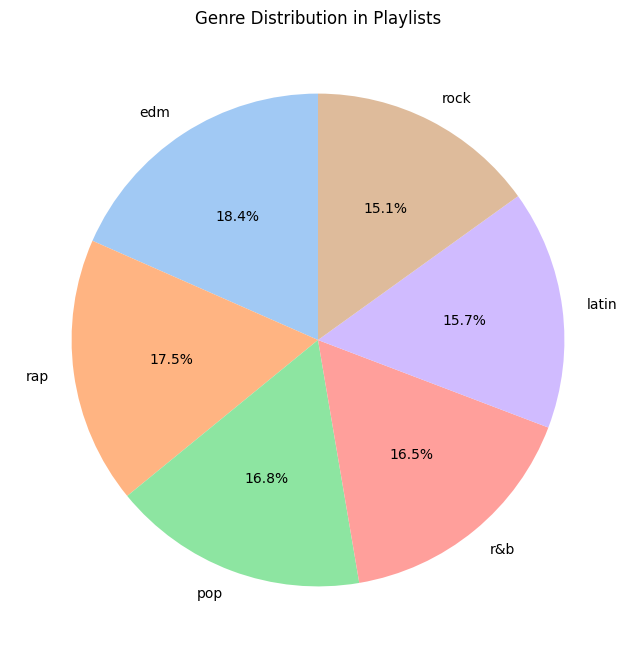

In [38]:
genre_counts = df['playlist_genre'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Genre Distribution in Playlists')
plt.show()

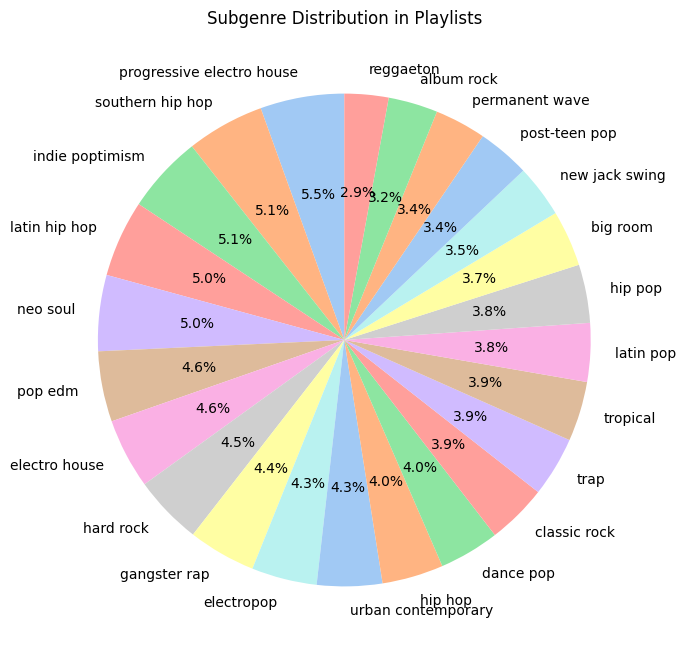

In [39]:
# describe playlist_subgenre
subgenre_counts = df['playlist_subgenre'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(subgenre_counts, labels=subgenre_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Subgenre Distribution in Playlists')
plt.show()

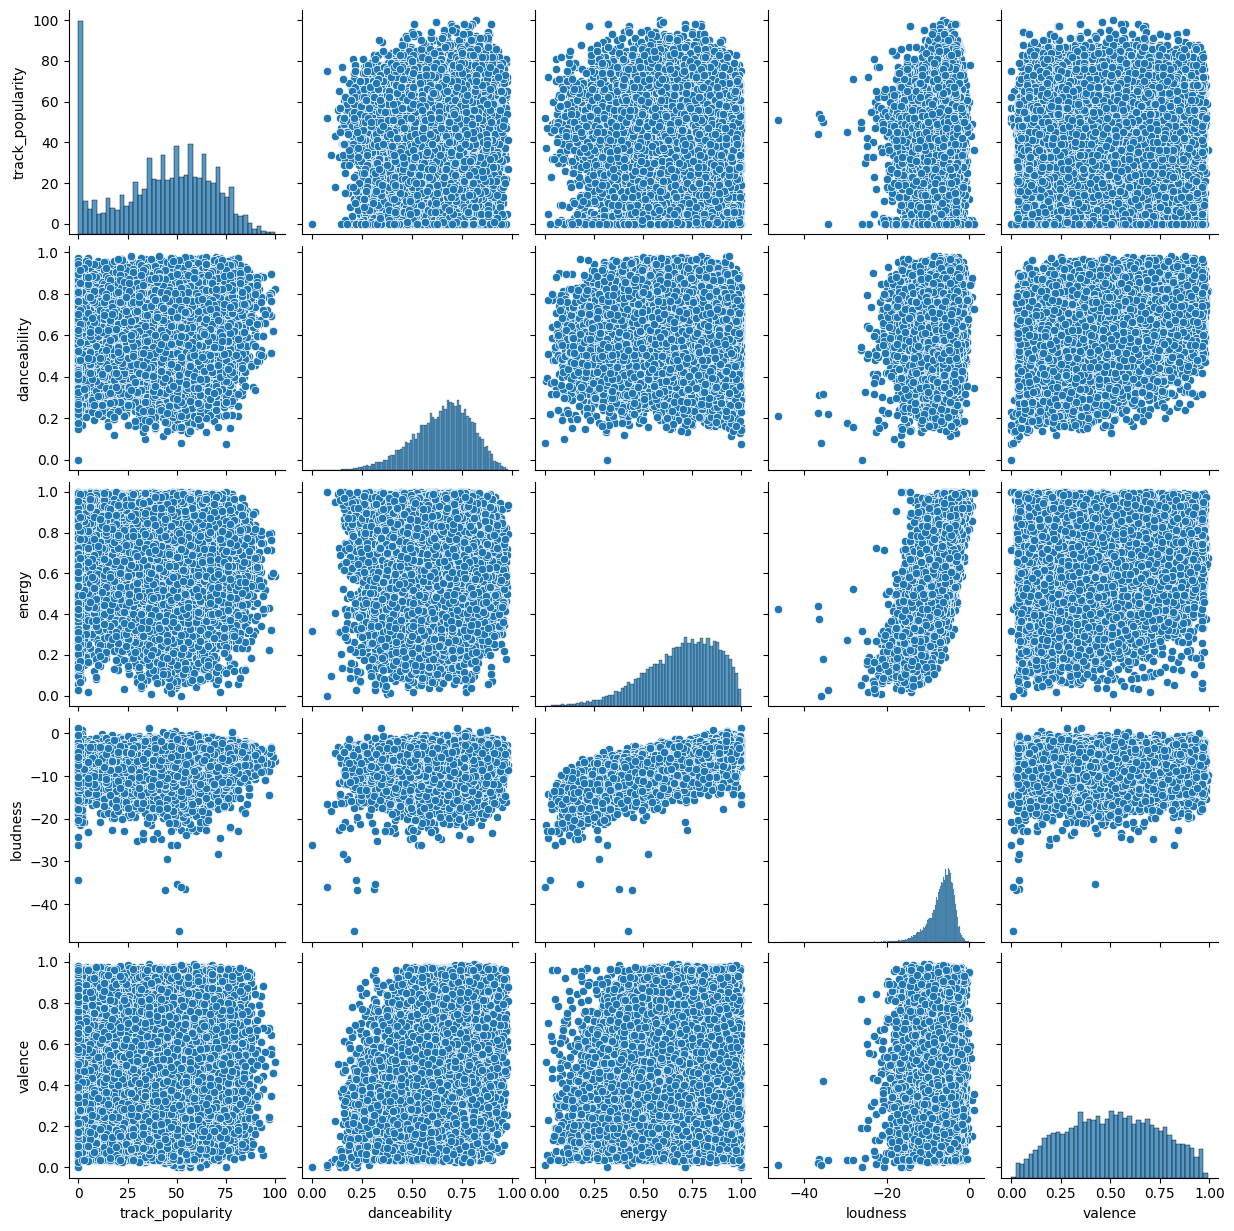

In [40]:
sns.pairplot(df[['track_popularity', 'danceability', 'energy', 'loudness', 'valence']])
plt.show()

We can see that all of the data is relatively evenly distributed except for energy and loudness. Loudness and energy are skewed to higher values. This could potentially lead us to have issues while trying to recommend softer or slower songs. Especially in genres such as lo-fi music which are especially soft and slow. 

In [41]:
#print out all values of subgenre column
print(df['playlist_subgenre'].unique())

['dance pop' 'post-teen pop' 'electropop' 'indie poptimism' 'hip hop'
 'southern hip hop' 'gangster rap' 'trap' 'album rock' 'classic rock'
 'permanent wave' 'hard rock' 'tropical' 'latin pop' 'reggaeton'
 'latin hip hop' 'urban contemporary' 'hip pop' 'new jack swing'
 'neo soul' 'electro house' 'big room' 'pop edm'
 'progressive electro house']


Due this not having much diversity other than markets inside the US, I am concerned about this working well with people with international music tastes. We would possibly need to expand this dataset. 

In [42]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

#plot heatmap in plotly
import plotly.express as px
fig = px.imshow(correlation_matrix)
fig.show()

In [43]:
# violin plot of playlist genre vs energy in plotly, differentiate by color
fig = px.violin(df, x='playlist_genre', y='energy', color='playlist_genre')
fig.show()

skewed to really high energy

In [44]:
# prompt: get the total no of artists from track_artist column by using unique values
df['track_artist'].nunique()
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [45]:
df['track_artist'].fillna('N/A', inplace=True)  # Fill missing values in a specific column
df['track_album_name'].fillna('N/A', inplace=True)  # Fill missing values in a specific column
df['track_name'].fillna('N/A', inplace=True)  # Fill missing values in a specific column
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

## Start of Actual Classification End of Preprocessing

In [46]:
from sklearn.preprocessing import LabelEncoder
categorical = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical:
    df[col] = le.fit_transform(df[col])

In [49]:
# dependent variables are 
y = df['playlist_subgenre']
X = df.drop(['playlist_subgenre'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_score(y_test, y_pred_dt)

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_score(y_test, y_pred_knn)

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_score(y_test, y_pred_svm)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_score(y_test, y_pred_lr)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_score(y_test, y_pred_nb)

# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

c:\Users\arush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.9806608801583676

In [52]:
# model comparison
models = ['Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Support Vector Machine', 'Logistic Regression', 'Naive Bayes', 'XGBoost']
accuracy = [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_xgb)]
model_comparison = pd.DataFrame({'Model': models, 'Accuracy': accuracy})
model_comparison

# plot model comparison in plotly
fig = px.bar(model_comparison, x='Model', y='Accuracy', color='Accuracy', height=600)
fig.show()


In [54]:
# generate precision, recall, f-1 score for all models
from sklearn.metrics import classification_report
print('Decision Tree')
print(classification_report(y_test, y_pred_dt))
print('Random Forest')
print(classification_report(y_test, y_pred_rf))
print('K-Nearest Neighbors')
print(classification_report(y_test, y_pred_knn))
print('Support Vector Machine')
print(classification_report(y_test, y_pred_svm))
print('Logistic Regression')
print(classification_report(y_test, y_pred_lr))
print('Naive Bayes')
print(classification_report(y_test, y_pred_nb))
print('XGBoost')
print(classification_report(y_test, y_pred_xgb))

Decision Tree
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       211
           1       1.00      0.99      0.99       256
           2       0.93      0.92      0.93       265
           3       0.98      0.99      0.99       239
           4       0.88      0.90      0.89       319
           5       1.00      0.98      0.99       268
           6       0.99      1.00      0.99       281
           7       0.94      0.94      0.94       302
           8       0.99      0.99      0.99       264
           9       0.96      0.97      0.97       228
          10       0.99      1.00      0.99       342
          11       0.93      0.95      0.94       338
          12       0.93      0.90      0.91       242
          13       0.99      0.98      0.99       326
          14       0.98      0.98      0.98       233
          15       1.00      1.00      1.00       205
          16       0.93      0.93      0.93       294
          17 

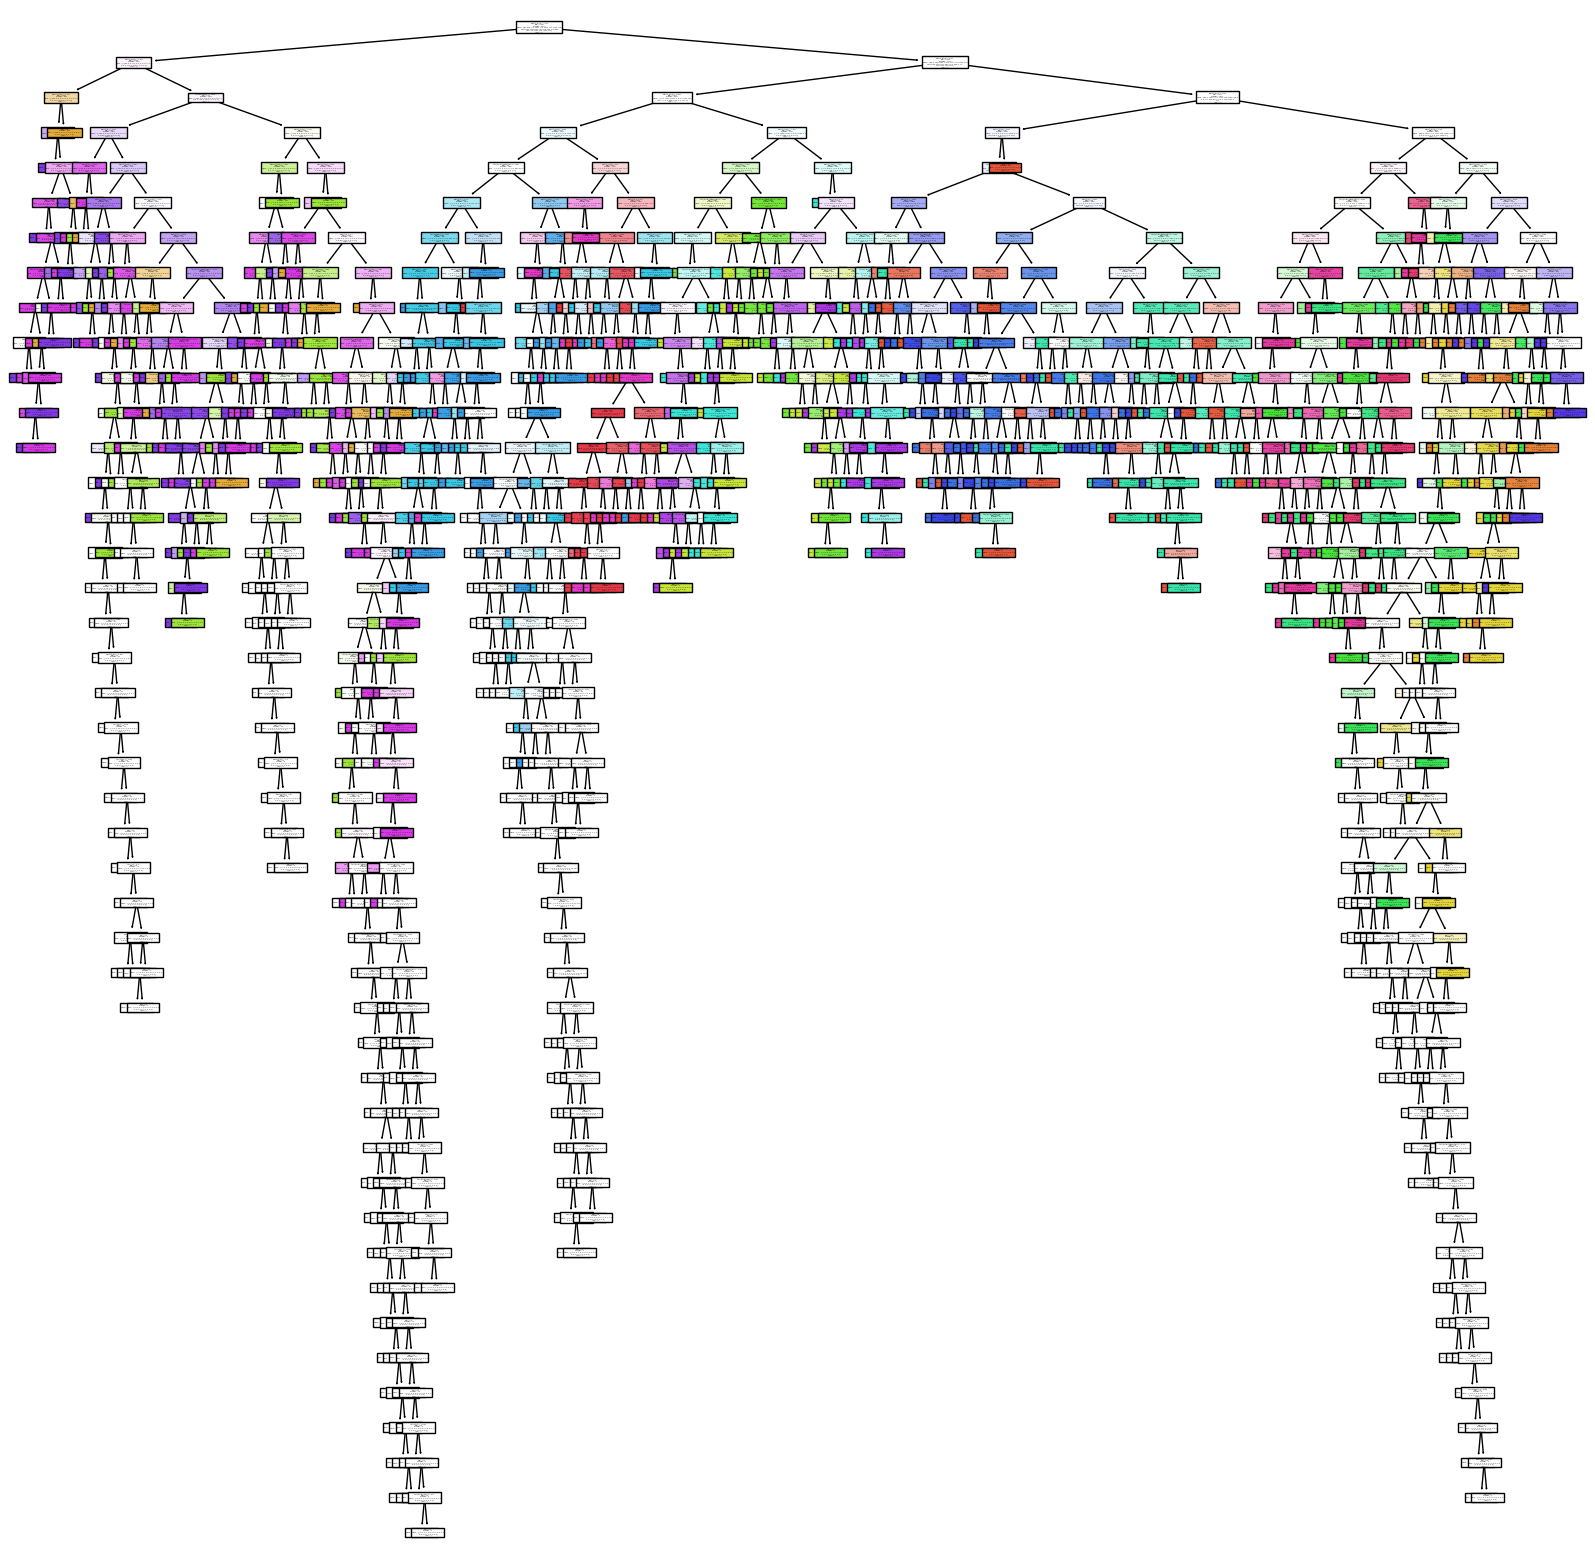

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

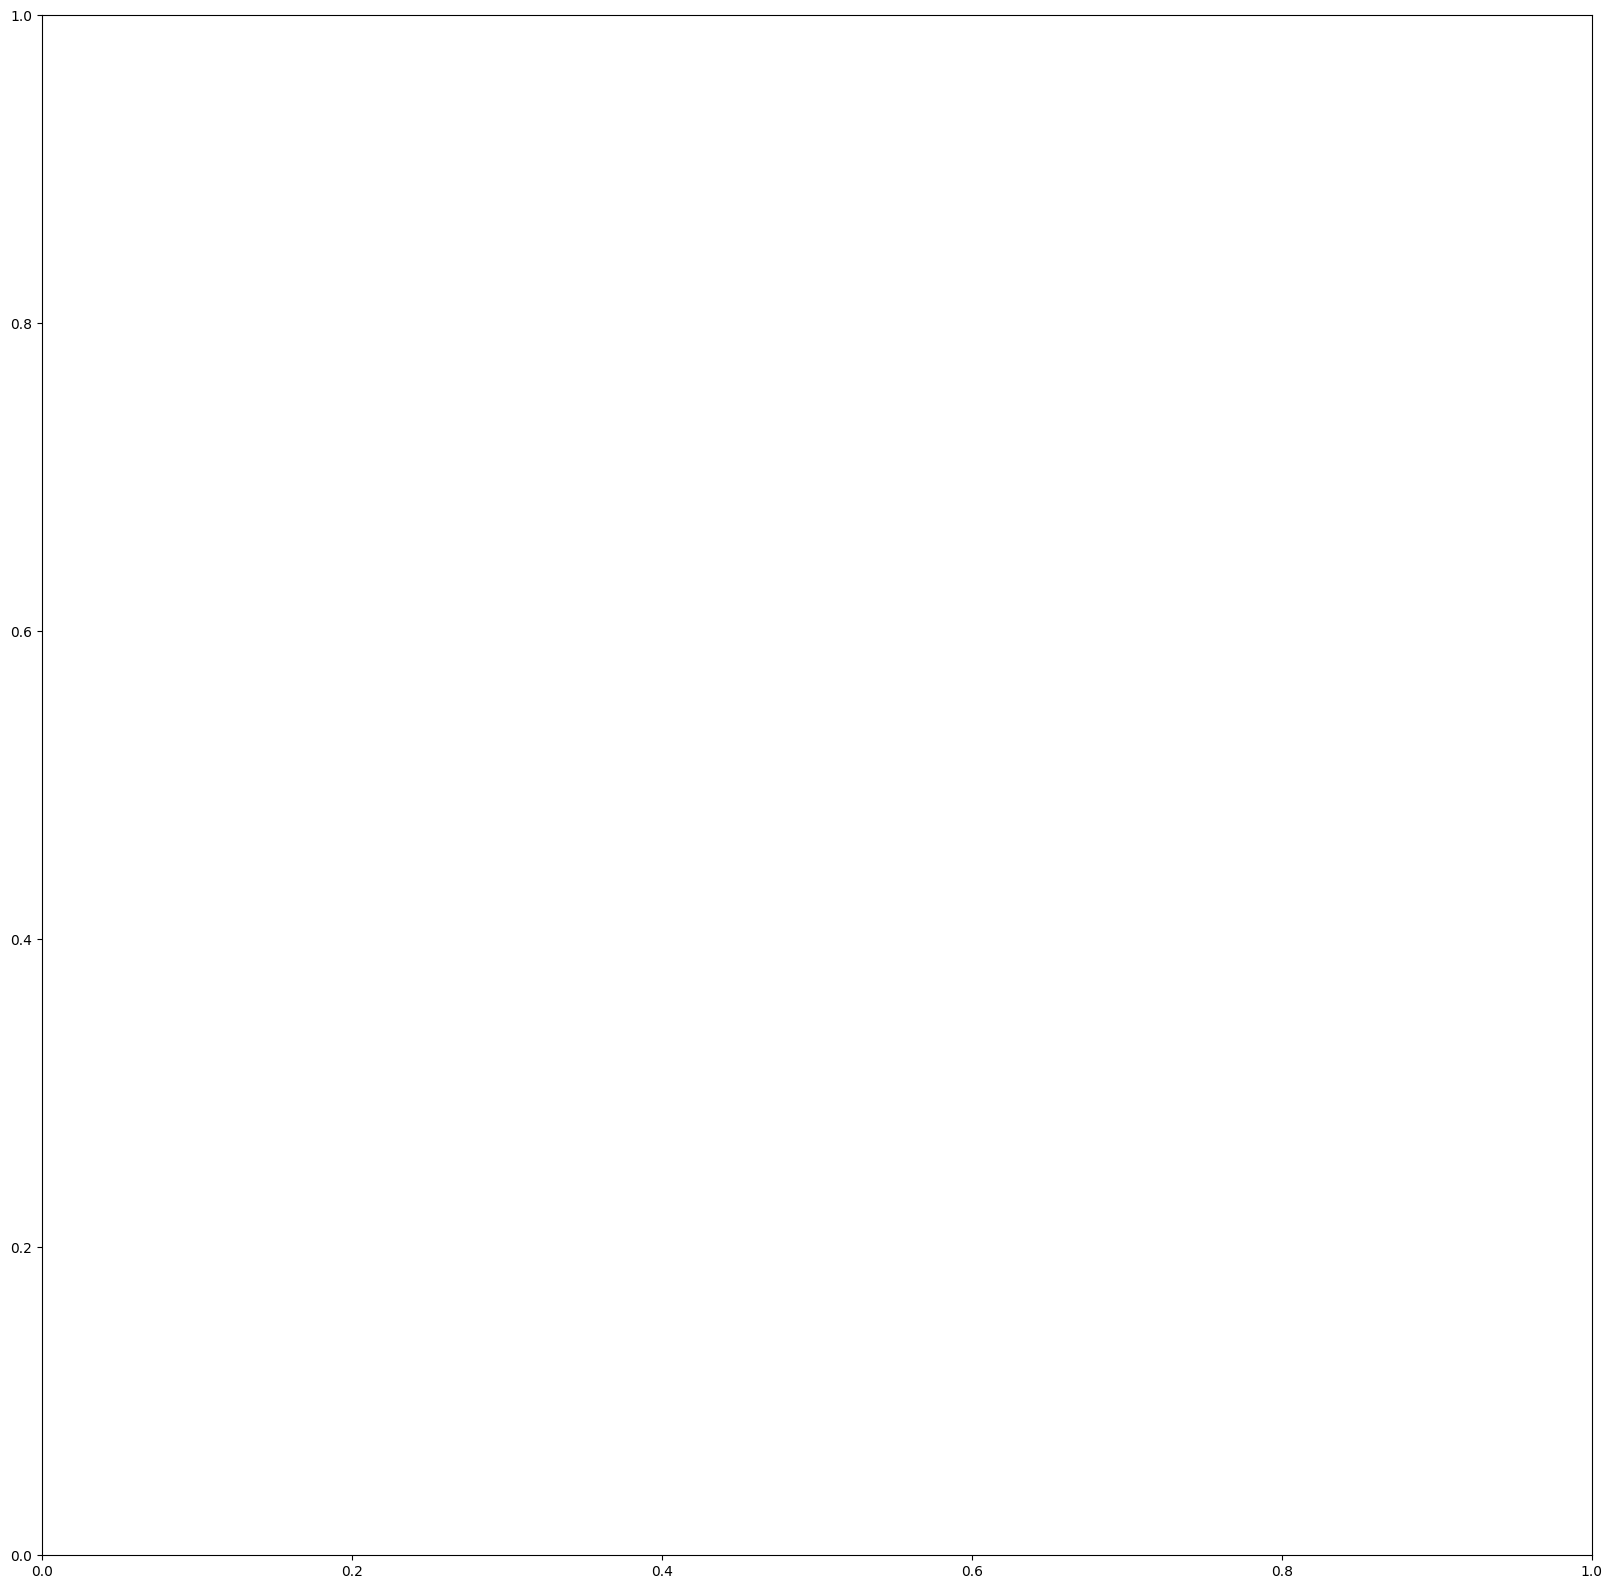

In [63]:
dt.classes_ = dt.classes_.astype(str)
# Create the plot with adjusted figure size
fig, ax = plt.subplots(figsize=(20, 20))  # Set desired width and height (in inches)
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree

# Keep track of column names
column_names = X.columns

plot_tree(dt, filled=True, feature_names=column_names, class_names=dt.classes_, ax=ax)
plt.show()

# Create a larger figure with tighter layout
fig, ax = plt.subplots(figsize=(20, 20))  # Increase figure size

# Customize plot appearance for better readability
plot_tree(
    dt,
    filled=True,
    feature_names=X_train.columns,
    class_names=dt.classes_,
    ax=ax,
    fontsize=10,  # Adjust font size for nodes
    rounded=True,  # Use rounded edges for nodes
    precision=2,  # Limit displayed values to 2 decimal places
)

# Improve text alignment for better clarity
plt.title("Decision Tree Visualization", fontsize=14, y=1.05)  # Adjust title position
plt.xlabel("Feature Name", fontsize=12)
plt.ylabel("Class", fontsize=12)